# Workbook 1 - Data Ingest & Plotting

Whatever you're going to do you're going to want to get data into your program and do something with it, perhaps even writing it back to disk afterwards!

This workbook will look at three common ways to ingest data from a file


## HDF Files

One of the most common file formats at Diamond is the NeXus, or HDF, file. These files are binary files which store data within them a lot like files are stored on a computer disc; by which I mean they have an internal structure.

![NeXus File Structure](images/01.png)

The screenshot above shows the typical internal structure of an [NXsas](https://manual.nexusformat.org/classes/applications/NXsas.html) compliant NeXus file. As you can see there's a lot in there, however, what would probably be of most interest would be the `data` array which has been highlighted.

To keep things a bit simplier, for this example we are going to work with a stripped down detector dataset where the data can be found under the path '/entry/data/data'

Before we get going we will need to import a new module `h5py`.

`h5py` is the 'official' Python package that handles HDF5 files, therefore if we are going to work with NeXus/HDF5 files we will need this package - documentation on this package and it's functions can be found here [HDF5 for Python](https://docs.h5py.org/)

In [1]:
import h5py

With our packages loaded we're now able to declare a couple of reference variables

In [2]:
file_path = 'data/i22-363058.h5'
internal_data_path = '/entry/data/data'

Whilst we could 'hard code' these into the following part of the script, having them as standalone strings allows, at a glance, to see a number of pertinent variables without having to dig through the code line-by-line; it also allows for easier code *refactoring* in the future.

*Refactoring* is "a systematic process of improving code without creating new functionality."

If we keep the `file_path` and `internal_data_path` as variables we can easily convert the next code fragment into a function without having to perform extensive code re-writing.

In [3]:
file_handle = h5py.File(file_path, 'r')

In the above we are asking h5py to open the file, found at `file_path` in the 'mode' `'r'`. 

A file mode lets Python know a little about what you're expecting to do with a file; there are 5 potential file 'modes' for `h5py`:

 - r	Readonly, file must exist (default)
 - r+	Read/write, file must exist
 - w	Create file, truncate if exists
 - w- or x	Create file, fail if exists
 - a	Read/write if exists, create otherwise
 
 Treat these with care and caution - opening a file with the wrong mode can end up over-writing the file resulting in data loss (permanent data loss if you don't have a backup!).

In [4]:
dataset = file_handle[internal_data_path][()]

Now that we have the file open, we are able to navigate to the data location in the file and ask `h5py` to return this as a `numpy` array using the `[()]` operator. 

Historically, this was achieved *via* use of `file_handle[internal_data_path].value()`, however, this is in the process of being depricated (phased out).

In [5]:
file_handle.close()

Now that we're done with the file, it is good practice to 'close' the file so as not to tie up resorces (or accidentally do something silly!), this is achieved using the `close()` function.

In [6]:
dataset

array([[[[-2,  0,  0, ...,  0,  0, -2],
         [ 1,  0,  1, ...,  0,  0,  0],
         [ 1,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  1,  0],
         [-2,  1,  1, ...,  0,  0, -2]]]], dtype=int32)

Interesting... seems to be a lot of opening and closing square brackets on this dataset...

In [7]:
print(dir(dataset))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

Having a quick look at the dataset using `dir()` reveals that we've got a lot of functions here, however, for now, we shall use shape to find out what 'shape' our data is:

In [8]:
print(dataset.shape)

(1, 1, 1679, 1475)


Ah, it seems that this dataset is a single frame of data that was acquired at a single position and therefore has the shape \[1, 1, detY, detX\] - if we address just the first element of this dataset...

In [9]:
dataset[0][0].shape

(1679, 1475)

Looks a bit more like one might expect now.

In [10]:
final_dataframe = dataset[0][0]
final_dataframe

array([[-2,  0,  0, ...,  0,  0, -2],
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [-2,  1,  1, ...,  0,  0, -2]], dtype=int32)

Chaining all of this together we get:

In [ ]:
import h5py

file_path = 'data/i22-363058.h5'
internal_data_path = '/entry/data/data'

file_handle = h5py.File(file_path, 'r')
dataset = file_handle[internal_data_path][()]
file_handle.close()

final_dataframe = dataset[0][0]

As ever, this is one way to acheive this. The above example will work for any file and any purpose, however, it's a blunt tool to get the job done - a more 'Pythonic' way of achieving this would be to use the `with` keyword:

In [12]:
import h5py

file_path = 'data/i22-363058.h5'
internal_data_path = '/entry/data/data'

with h5py.File(file_path, "r") as file_handle:
    dataset = file_handle[internal_data_path][()]
    
final_dataframe = dataset[0][0]

At first glance it would seem that all this has done is to remove the `close()` statement, however, using this mechanism provides a richer set of *exceptions* allowing you to debug your code more effectively.

With some data 'in hand' let's look at another couple of ways of extracting data from files before moving on to plotting this data.


## Delimited Text Files

Be they tabs, commas, spaces, a lot of data files are simply text that makes use of a `delimiter`. As this is such a common way of persisting (saving) data to disk there are a number of functions in a number of modules that will handle this for you. In this example we're going to use the `numpy` module.

`numpy` is probably one, if not the most, imported package in Python. If you are going to do *anything* scientific with numbers in Python you'll want `numpy` by your side. The reference manual for `numpy` can be found here [NumPy Reference](https://numpy.org/doc/stable/reference/index.html), however, you'd probably find using Google and a well crafted search a better navigator of the `numpy` manual as it is **extensive**.

![Numpy](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig2_HTML.png)
<div align="center"><br />
NumPy is the base of the scientific Python ecosystem - <a href="https://doi.org/10.1038/s41586-020-2649-2">Array Programming with NumPy</a> - CC-BY-4.0
</div>

In [15]:
import numpy as np # As is convention

data = np.loadtxt('data/i22-363110.dat', comments = '#', skiprows = 0, delimiter = '\t')
data.shape

(508, 3)

Two things come up here, the use of `#`'s in Python programs and `np.loadtxt`

If you see a line starting with a `#`, or some text after a `#` in a line these are *comments*. Python ignores *anything* after a `#` character on that line. If you require to make multi-line comments it is *suggested* that you use multiple `#` symbols on many lines rather than using the multi-line 'docstring' keyword.

The exact reasoning for this is beyond the scope of this exercise but more information can be found here: [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/#block-comments).

Next up, `np.loadtxt`, with this function we have specified:

 - a path to the file
 - that any lines starting with `#`'s to be ignored (typically headers)
 - that we intend to load the whole data part of the file, not skipping any rows in the file
 - that the delimiter is a tab character (`\t`\*)

Complete documentation on `np.loadtxt()` can be found here [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)

\* - A full list of so-called 'string literals' can be found here [Lexical analysis](https://docs.python.org/3/reference/lexical_analysis.html) under section 2.4.1.

With this dataset in hand we can use 'fancy' indexing to get out the first two columns of the data into two separate arrays:

In [44]:
x_data = data[:,0]
y_data = data[:,1]
dy_data = data[:,2]

print(x_data[0:10])
print('')
print(y_data[0:10])
print('')
print(dy_data[0:10])

[0.00207341 0.00209218 0.00211112 0.00213023 0.00214952 0.00216898
 0.00218861 0.00220843 0.00222842 0.00224859]

[274.74403 303.29425 271.66923 285.5004  265.73138 258.15683 254.83173
 286.19406 273.93489 251.8923 ]

[14.857878  17.246302  14.28678   14.300543   7.427272   8.8390361
  7.2483338 11.47113    8.68744    9.3103618]


With some data 'in hand' let's look at one final way to extracting data from files before moving on to plotting this data.


### Further reading

`numpy` also has a `fromfile()` function for extracting out binary data from a file, as opposed to text data: [numpy.fromfile](https://numpy.org/doc/stable/reference/generated/numpy.fromfile.html)


## Custom File Loading

As covered yesterday, it is *highly* recommend using an existing package in order to load data from a file. As such this section will be more of a refernce 'how-to' rather than a fully worked example.

Firstly we must understand what format the data is in, is it text or binary?

In [ ]:
file_handle = open('path/to/file.aaa', 'r')

Using this form of the Python `open` keyword will, by default, attempt to open a file for reading text. This plays well with a number of file formats, however, creates headaches for pure binary files. In the case of binary data:

In [ ]:
file_handle = open('path/to/file.aaa', 'rb')

The `rb` file mode will load the file as pure binary meaning that you won't have to cast a potentially very long string into a binary format before dealing with the binary data.

When directly handling files the following functions are of great use:

 - `read()` - Reads a number of bytes from a file
 - `readline()` - Reads a line of a file
 - `readlines()` - Reads *n* lines of a file or, if no number is specified, the whole file into a list
 - `seek()` - Go to byte *n* of a file, or the beginning of the file if no number is specified
 
Once you have loaded data into your program there are a number programming patterns that will help you 'unpack' your data into something more 'useful' downstream.

By far the most straightforward is `numpy`'s `frombuffer` function. This behaves exactly the same as `np.fromfile` but expects the binary data to be coming from a loaded variable rather than a file. To load in a stream of integer binary data you'd simply need to use:

In [ ]:
import numpy as np

with open('path/to/file.aaa', 'rb') as file_handle:
    binary_data = file_handle.read()

data = np.frombuffer(binary_data, dtype=int)

It is worth noting that the `dtype` keyword refers to the `d`ata `type` and a full list of these can be found here: [Data type objects (dtype)](https://numpy.org/doc/stable/reference/arrays.dtypes.html)

Reading in text data usually makes use of Python's `strip` and `split` functions:

In [25]:
text_string = ...........'A long string, full of lots of characters, that we can play with...........'

The `strip()` function simply removes all occurances of a particular character at the beginning or end of a string:

In [31]:
stripped_string = text_string.strip('.')
print(stripped_string)

A long string, full of lots of characters, that we can play with


From here we might want to break this line down into parts using a delimiter such as the **mighty comma*:

In [32]:
string_list = stripped_string.split(',')
print(string_list)

['A long string', ' full of lots of characters', ' that we can play with']


As you can see, this starts to encroach on `numpy`s `fromtxt` function which would be the recommeded route to pursue here...



## Plotting Data!

Right, we've got some data: `final_dataframe` and `x_data`/`y_data`: let's see what we've loaded in!

To do this we're going to use a module called `matplotlib` so called because it was designed to bring all of MATLABs plotting library to Python.

It is deceptively easy to start using but has the appeal of drawing you ever deeper in by offering increasingly beautiful plots...

### 1D Plots

To start with, let's visualise the `x_data`/`y_data` dataset.

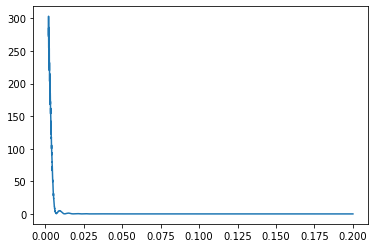

In [35]:
import matplotlib.pyplot as plt # As is the convention

plt.plot(x_data, y_data)
plt.show()

Excellent!

Hopefully the syntax isn't too taxing, we simply specify that we'd like to plot dataset `a` against `b` and ask for that plot to be shown (we might want multiple lines on a graph).

Except... SAXS data is usually plotted on a log scale!

OK, round two!

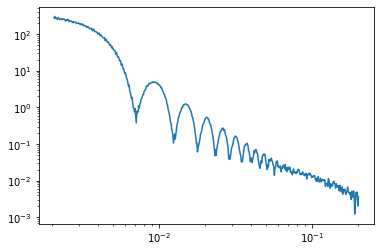

In [36]:
plt.plot(x_data, y_data)
plt.yscale('log')
plt.xscale('log')
plt.show()

Excellent!

Just a couple of new functions and we've gone from a linear plot to a log plot, except... axis labels anyone?

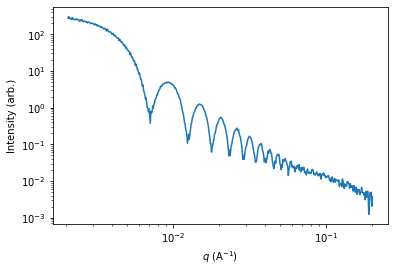

In [41]:
plt.plot(x_data, y_data)
plt.yscale('log')
plt.ylabel('Intensity (arb.)')
plt.xscale('log')
plt.xlabel('$q$ (A$^{-1}$)')
plt.show()

Excellent!

With a couple more functions (and some additions from the [Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html) section of the MPL documentation) we've got a plot, on a log scale, with axis labels, except... a plot title anyone? Defined plot limits? Uncertainties on the datapoints?

Everything *is* possible but things quickly start sprawling out of control. The MPL documentation has wonderful pages of [graphical examples](https://matplotlib.org/stable/gallery/index.html) and through [reference guide](https://matplotlib.org/stable/api/pyplot_summary.html) for every function, however these [cheat sheets](https://github.com/matplotlib/cheatsheets#cheatsheets) are the ultimate - at a glance - reference guide.

The beginner's cheatsheet is probably enough to be going on for now:

![Beginner's cheatsheet](https://github.com/matplotlib/cheatsheets/raw/master/handout-beginner.png)


With all of this in mind - we can finally arrive at a graph like this:

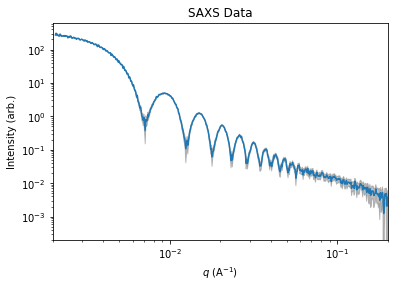

In [49]:
plt.plot(x_data, y_data)
plt.title('SAXS Data')
plt.yscale('log')
plt.ylabel('Intensity (arb.)')
plt.xscale('log')
plt.xlabel('$q$ (A$^{-1}$)')
plt.xlim(0.002, 0.2)
plt.fill_between(x_data, y_data - dy_data, y_data + dy_data, color='gray', alpha=0.5)
plt.show()

And this marks only the start of the rabbit hole one can go down...

Remember, easy to pick up but difficult to put down!

Rather than go through all of the different functions in depth the above serves as a minimum working example of the kinds of functions that you might wish to use when constructing a line plot.

### 2D Plots

In a similar vein to 1D plotting - deceptively simple using `plt.imshow()`:

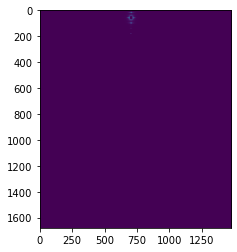

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(final_dataframe)
plt.show()

However, as this is SAXS data it would be better if the intensities were log scaled, which we can do with `np.log()`

<ipython-input-52-6f189cc11bcd>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(final_dataframe))
<ipython-input-52-6f189cc11bcd>:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(final_dataframe))


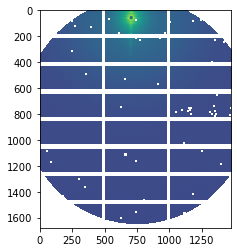

In [52]:
plt.imshow(np.log(final_dataframe))
plt.show()

Now, there's a few error messages here as taking the logarithm of zero, or negative numbers, is somewhat mathematically frowned upon. However, `numpy` is forgiving and moves on complaining into the ether about the numpties that are using it.

Naturally, most of the above methods *e.g.* `x/ylabel`, `x/ylim`, `title`, etc. are all still valid for this form of plotting and exploration is encouraged!

## Further reading

h5py - [HDF5 for Python](https://docs.h5py.org)
numpy - [NumPy Documentation](https://numpy.org/doc/)
matplotlib - [Overview - Matplotlib](https://matplotlib.org/stable/contents.html)